In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [60]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")

data.head()

,amount,success,3D_secured,hour,day_of_week,month,amount_norm,card_Diners,card_Master,card_Visa,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,89,0,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
1,89,1,0,0,1,1,0.133013,0,0,1,0,1,0,0,0,0,1
2,238,0,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
3,238,1,1,0,1,1,0.371795,1,0,0,0,1,0,0,0,0,1
4,124,0,0,0,1,1,0.189103,1,0,0,1,0,0,0,0,1,0


In [74]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.8111485816306289
Precision: 0.6176470588235294
Recall: 0.021875
F1: 0.04225352112676056


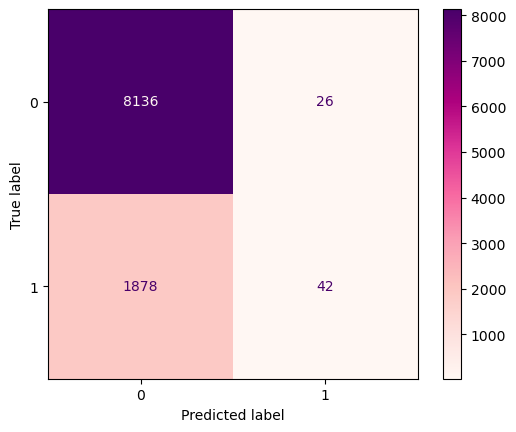

In [62]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Evaluate the model 
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log}\nPrecision: {precision_log}\nRecall: {recall_log}\nF1: {f1_log}")

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [63]:
# Create a class balanced data set with SMOTE to retrain models on
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.8076770482047213
Precision: 0.4316546762589928
Recall: 0.03125
F1: 0.05828071879553181


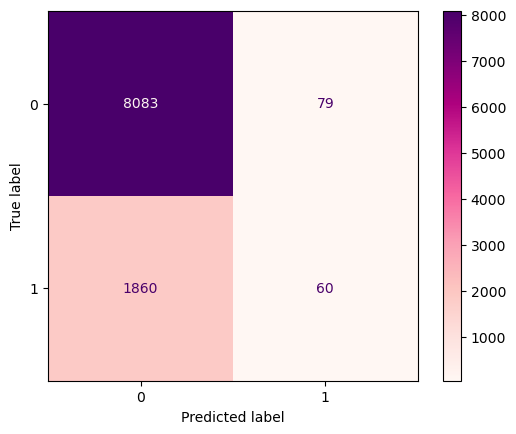

In [64]:
# Train a new logistic regression model with SMOTE balanced classes
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test)

# Evalute Accuracy
accuracy_log_bal = accuracy_score(y_test, smote_y_pred)
precision_log_bal = precision_score(y_test, smote_y_pred)
recall_log_bal = recall_score(y_test, smote_y_pred)
f1_log_bal = f1_score(y_test, smote_y_pred)

print(f"Accuracy: {accuracy_log_bal}\nPrecision: {precision_log_bal}\nRecall: {recall_log_bal}\nF1: {f1_log_bal}")

# Display the confusion matrix
cm = confusion_matrix(y_test, smote_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')
plt.show()

Accuracy: 0.7668121404483238
Precision: 0.23687423687423687
Recall: 0.10104166666666667
F1: 0.1416575392479007


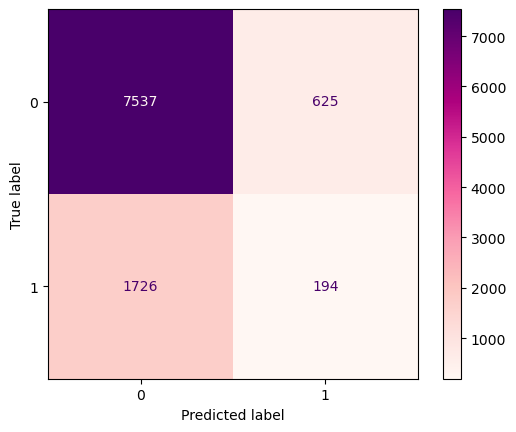

In [65]:
#Random forest model without SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#assess accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}\nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1: {f1_rf}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7668121404483238
Precision: 0.23687423687423687
Recall: 0.10104166666666667
F1: 0.1416575392479007


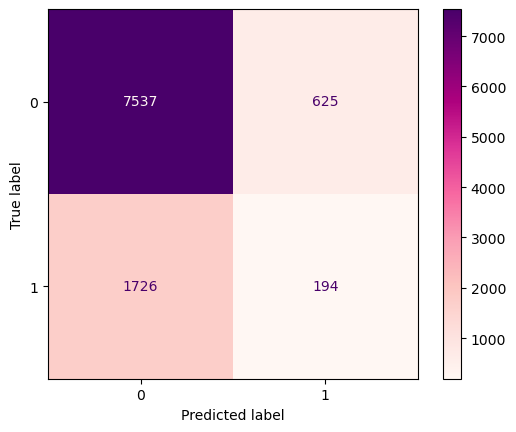

In [66]:
#Random forest model with scikit balanced
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_model.predict(X_test)

#assess accuracy
accuracy_rf_bal = accuracy_score(y_test, y_pred_rf_balanced)
precision_rf_bal = precision_score(y_test, y_pred_rf_balanced)
recall_rf_bal = recall_score(y_test, y_pred_rf_balanced)
f1_rf_bal = f1_score(y_test, y_pred_rf_balanced)

print(f"Accuracy: {accuracy_rf_bal}\nPrecision: {precision_rf_bal}\nRecall: {recall_rf_bal}\nF1: {f1_rf_bal}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_balanced)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7552073001388613
Precision: 0.2629757785467128
Recall: 0.15833333333333333
F1: 0.1976592977893368


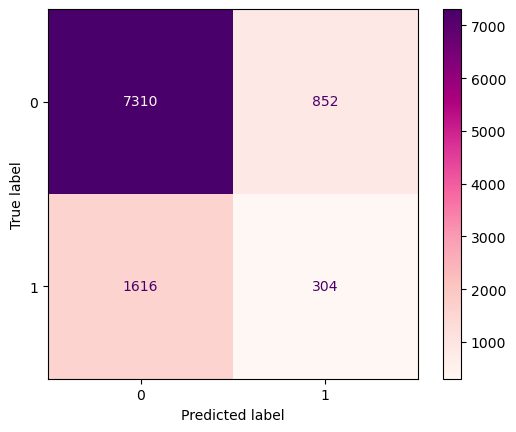

In [67]:
#Train Random forest Model with SMOTE balanced classes
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

#Assess accuracy for randomforest model
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)

print(f"Accuracy: {accuracy_rf_smote}\nPrecision: {precision_rf_smote}\nRecall: {recall_rf_smote}\nF1: {f1_rf_smote}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7997421146597897
Precision: 0.40816326530612246
Recall: 0.11458333333333333
F1: 0.17893452623017486


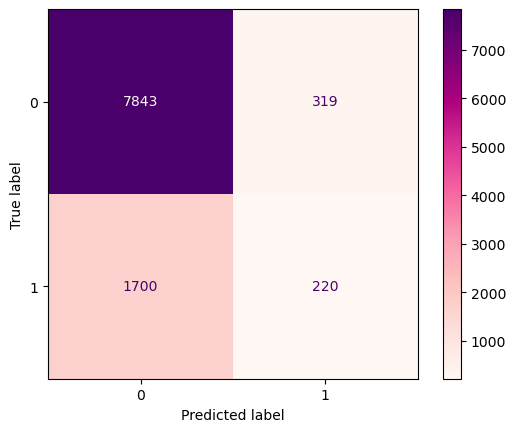

In [68]:
# Train a model with gradient boosting
gb_model = GradientBoostingClassifier(random_state=42, max_depth=5)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)

# Evalutate Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}\nPrecision: {precision_gb}\nRecall: {recall_gb}\nF1: {f1_gb}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.7970640745883754
Precision: 0.0
Recall: 0.0
F1: 0.0


c:\Users\Phil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


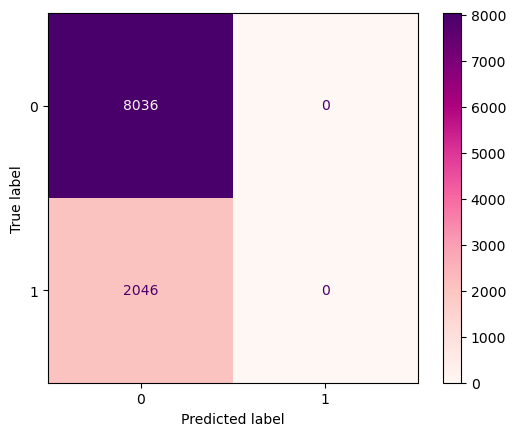

In [77]:
# Train a model using SVM
# Need a scalar for the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evalutate Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}\nPrecision: {precision_svm}\nRecall: {recall_svm}\nF1: {f1_svm}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [69]:
results = pd.DataFrame()
results['Key'] = ['Accuracy', 'Precision', 'Recall', 'F1']
results['Logistic'] = [accuracy_log, precision_log, recall_log, f1_log]
results['Logistic_Balanced'] = [accuracy_log_bal, precision_log_bal, recall_log_bal, f1_log_bal]
results['RandomForest'] = [accuracy_rf, precision_rf, recall_rf, f1_rf]
results['RandomForest_Balanced'] = [accuracy_rf_bal, precision_rf_bal, recall_rf_bal, f1_rf_bal]
results['RandomForest_SMOTE'] = [accuracy_rf_smote, precision_rf_smote, recall_rf_smote, f1_rf_smote]
results['GradientBoosting'] = [accuracy_gb, precision_gb, recall_gb, f1_gb]
results.T

,0,1,2,3
Key,Accuracy,Precision,Recall,F1
Logistic,0.811149,0.617647,0.021875,0.042254
Logistic_Balanced,0.807677,0.431655,0.03125,0.058281
RandomForest,0.766812,0.236874,0.101042,0.141658
RandomForest_Balanced,0.766812,0.236874,0.101042,0.141658
RandomForest_SMOTE,0.755207,0.262976,0.158333,0.197659
GradientBoosting,0.799742,0.408163,0.114583,0.178935
